# Cohort analysis

In this project I am creating a retention table for year 2015 from the superstore sales data

In [1]:
# Load packages and read data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv('superstore.csv')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Select columns needed

df = df[['customer_id', 'order_date']]
df.head()

,customer_id,order_date
0,CG-12520,11/8/16
1,CG-12520,11/8/16
2,DV-13045,6/12/16
3,SO-20335,10/11/15
4,SO-20335,10/11/15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  9994 non-null   object
 1   order_date   9994 non-null   object
dtypes: object(2)
memory usage: 156.3+ KB


In [4]:
# Convert order_date to datetime

df.order_date = pd.to_datetime(df.order_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  9994 non-null   object        
 1   order_date   9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 156.3+ KB


In [5]:
# Select year 2015

df = df[df.order_date.dt.year==2015]
df.head()

,customer_id,order_date
3,SO-20335,2015-10-11
4,SO-20335,2015-10-11
14,HP-14815,2015-11-22
15,HP-14815,2015-11-22
24,EB-13870,2015-09-25


In [6]:
# Create order month column

df['order_month'] = df['order_date'].dt.to_period('M')
df.head()

,customer_id,order_date,order_month
3,SO-20335,2015-10-11,2015-10
4,SO-20335,2015-10-11,2015-10
14,HP-14815,2015-11-22,2015-11
15,HP-14815,2015-11-22,2015-11
24,EB-13870,2015-09-25,2015-09


In [7]:
# Create cohort column

df['cohort'] = df.groupby('customer_id')['order_month'].transform(np.min)
df.head()

,customer_id,order_date,order_month,cohort
3,SO-20335,2015-10-11,2015-10,2015-10
4,SO-20335,2015-10-11,2015-10,2015-10
14,HP-14815,2015-11-22,2015-11,2015-10
15,HP-14815,2015-11-22,2015-11,2015-10
24,EB-13870,2015-09-25,2015-09,2015-05


In [8]:
# Create tracking period column

df['period'] = df.order_month.dt.month - df.cohort.dt.month
df.head()

,customer_id,order_date,order_month,cohort,period
3,SO-20335,2015-10-11,2015-10,2015-10,0
4,SO-20335,2015-10-11,2015-10,2015-10,0
14,HP-14815,2015-11-22,2015-11,2015-10,1
15,HP-14815,2015-11-22,2015-11,2015-10,1
24,EB-13870,2015-09-25,2015-09,2015-05,4


In [9]:
# Select only customer_id, cohort, period and sort the data frame by cohort and period

df = df[['customer_id', 'cohort', 'period']]
df.head()

,customer_id,cohort,period
3,SO-20335,2015-10,0
4,SO-20335,2015-10,0
14,HP-14815,2015-10,1
15,HP-14815,2015-10,1
24,EB-13870,2015-05,4


In [10]:
df = df.sort_values(['cohort','period'])
df.head()

,customer_id,cohort,period
92,KB-16315,2015-01,0
93,KB-16315,2015-01,0
94,KB-16315,2015-01,0
212,VW-21775,2015-01,0
213,VW-21775,2015-01,0


In [11]:
# Create a cohort table to see how many unique customers there are for each cohort and period

cohort_table = pd.pivot_table(
    df,
    index = 'cohort',
    columns = 'period',
    values = 'customer_id',
    aggfunc = 'nunique',
)
cohort_table

period,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2015-01,28.0,2.0,2.0,NaN,4.0,2.0,4.0,1.0,5.0,3.0,3.0,2.0
2015-02,34.0,2.0,4.0,1.0,4.0,2.0,3.0,7.0,7.0,9.0,7.0,NaN
2015-03,73.0,6.0,8.0,9.0,6.0,7.0,11.0,11.0,16.0,8.0,NaN,NaN
2015-04,59.0,4.0,4.0,5.0,4.0,7.0,6.0,12.0,3.0,NaN,NaN,NaN
2015-05,52.0,2.0,2.0,5.0,12.0,6.0,9.0,10.0,NaN,NaN,NaN,NaN
2015-06,47.0,5.0,3.0,10.0,2.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN
2015-07,40.0,3.0,4.0,4.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08,38.0,6.0,3.0,5.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09,64.0,5.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Get the numbers of customers in period 0, call it cohort_size

cohort_size = cohort_table.loc[:,0]
cohort_size

cohort
2015-01    28.0
2015-02    34.0
2015-03    73.0
2015-04    59.0
2015-05    52.0
2015-06    47.0
2015-07    40.0
2015-08    38.0
2015-09    64.0
2015-10    32.0
2015-11    61.0
2015-12    45.0
Freq: M, Name: 0, dtype: float64

In [16]:
# Create retention table by dividing cohort table by cohort size

retention_table = cohort_table.divide(cohort_size, axis=0)
retention_table

period,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2015-01,1.0,0.071429,0.071429,NaN,0.142857,0.071429,0.142857,0.035714,0.178571,0.107143,0.107143,0.071429
2015-02,1.0,0.058824,0.117647,0.029412,0.117647,0.058824,0.088235,0.205882,0.205882,0.264706,0.205882,NaN
2015-03,1.0,0.082192,0.109589,0.123288,0.082192,0.095890,0.150685,0.150685,0.219178,0.109589,NaN,NaN
2015-04,1.0,0.067797,0.067797,0.084746,0.067797,0.118644,0.101695,0.203390,0.050847,NaN,NaN,NaN
2015-05,1.0,0.038462,0.038462,0.096154,0.230769,0.115385,0.173077,0.192308,NaN,NaN,NaN,NaN
2015-06,1.0,0.106383,0.063830,0.212766,0.042553,0.276596,0.212766,NaN,NaN,NaN,NaN,NaN
2015-07,1.0,0.075000,0.100000,0.100000,0.125000,0.225000,NaN,NaN,NaN,NaN,NaN,NaN
2015-08,1.0,0.157895,0.078947,0.131579,0.342105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09,1.0,0.078125,0.125000,0.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='period', ylabel='cohort'>

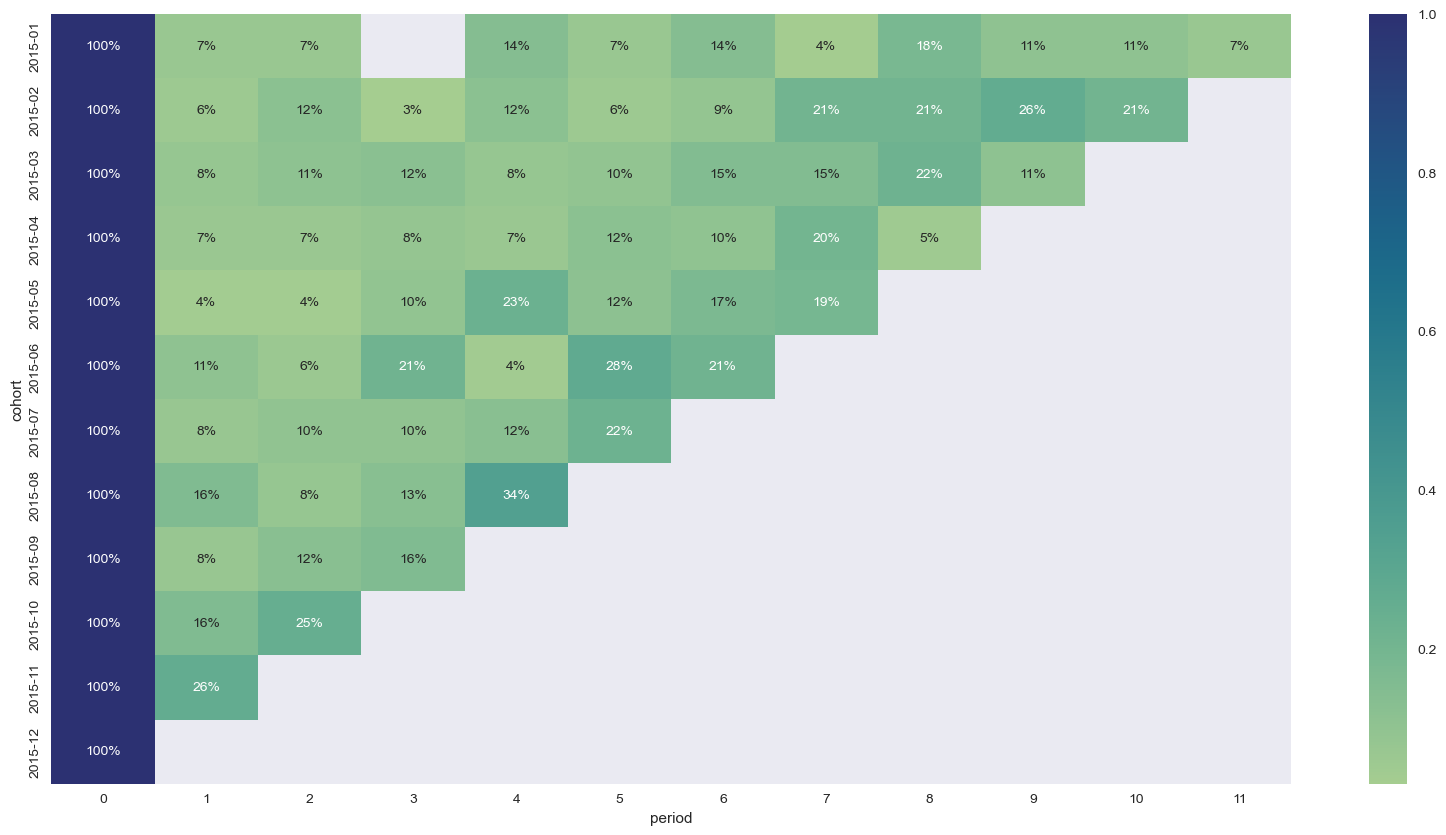

In [17]:
# Visualize the retention table

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(retention_table, annot=True, fmt='.0%', cmap='crest')